# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
pip install statsmodels matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---
## A. Project Description


In [5]:
# <Student to fill this section>
student_name = "Kittituch Wongwatcharapaiboon"
student_id = "25544646"
group_id = "13"

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [7]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [8]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [9]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [11]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [13]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [14]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [15]:
import pandas as pd
import glob
import os

# Folder containing all yearly Ethereum CSVs
DATA_DIR = "../data/raw/Ethereum"

# Output folder and file
OUTPUT_DIR = "../data/processed"
os.makedirs(OUTPUT_DIR, exist_ok=True)  # create if not exist
OUTPUT_FILE = os.path.join(OUTPUT_DIR, "Ethereum_all_years.csv")

# Get all CSV files in the folder
files = sorted(glob.glob(os.path.join(DATA_DIR, "Ethereum_*.csv")))

print(f"Found {len(files)} Ethereum files:")
for f in files:
    print("-", os.path.basename(f))

# Read and combine
dfs = []
for f in files:
    df = pd.read_csv(f, sep=';', quotechar='"', engine='python')
    dfs.append(df)

# Concatenate all DataFrames
df = pd.concat(dfs, ignore_index=True)
print("\nCombined shape:", df.shape)

# Save to CSV
df.to_csv(OUTPUT_FILE, index=False)
print(f"\nSaved combined dataset to: {OUTPUT_FILE}")

# Preview
df.head()


Found 10 Ethereum files:
- Ethereum_01_01_2015-01_01_2016_historical_data_coinmarketcap.csv
- Ethereum_01_01_2016-01_01_2017_historical_data_coinmarketcap.csv
- Ethereum_01_01_2017-01_01_2018_historical_data_coinmarketcap.csv
- Ethereum_01_01_2018-01_01_2019_historical_data_coinmarketcap.csv
- Ethereum_01_01_2019-01_01_2020_historical_data_coinmarketcap.csv
- Ethereum_01_01_2020-01_01_2021_historical_data_coinmarketcap.csv
- Ethereum_01_01_2021-01_01_2022_historical_data_coinmarketcap.csv
- Ethereum_01_01_2022-01_01_2023_historical_data_coinmarketcap.csv
- Ethereum_01_01_2023-01_01_2024_historical_data_coinmarketcap.csv
- Ethereum_01_01_2024-01_01_2025_historical_data_coinmarketcap.csv

Combined shape: (3434, 12)

Saved combined dataset to: ../data/processed/Ethereum_all_years.csv


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2015-12-31T00:00:00.000Z,2015-12-31T23:59:59.999Z,2015-12-31T04:24:27.000Z,2015-12-31T00:09:27.000Z,2781,0.912098,0.975414,0.910277,0.933542,663994.0,7.085802e+07,2015-12-31T23:59:59.999Z
1,2015-12-30T00:00:00.000Z,2015-12-30T23:59:59.999Z,2015-12-30T20:34:30.000Z,2015-12-30T02:09:28.000Z,2781,0.874258,0.941099,0.866647,0.911958,604078.0,6.919677e+07,2015-12-30T23:59:59.999Z
2,2015-12-29T00:00:00.000Z,2015-12-29T23:59:59.999Z,2015-12-29T23:59:28.000Z,2015-12-29T09:09:26.000Z,2781,0.843835,0.873054,0.833232,0.873054,215742.0,6.622290e+07,2015-12-29T23:59:59.999Z
3,2015-12-28T00:00:00.000Z,2015-12-28T23:59:59.999Z,2015-12-28T03:59:25.000Z,2015-12-28T20:59:26.000Z,2781,0.856356,0.872394,0.832932,0.845005,235134.0,6.407428e+07,2015-12-28T23:59:59.999Z
4,2015-12-27T00:00:00.000Z,2015-12-27T23:59:59.999Z,2015-12-27T02:54:27.000Z,2015-12-27T16:29:26.000Z,2781,0.853166,0.861538,0.841151,0.856365,164565.0,6.491392e+07,2015-12-27T23:59:59.999Z


### C.2 Define Target variable

In [16]:
import numpy as np

# Make sure your data is time-sorted
df = df.sort_values("timeOpen").reset_index(drop=True)

# ===== CONFIGURATION =====
TARGET_HORIZON = 2          # prediction horizon (1 = t+1, 2 = t+2)
TARGET_MODE = "raw"  # choose from: "raw", "return", "diff", "log_return"
# ==========================

# Create base raw target (future HIGH)
col_raw = f"target_high_t{TARGET_HORIZON}_raw"
df[col_raw] = df["high"].shift(-TARGET_HORIZON)

# Safe target column name
col_target = f"target_high_t{TARGET_HORIZON}_{TARGET_MODE}"

# Compute the target based on mode
if TARGET_MODE == "raw":
    df[col_target] = df[col_raw]
    to_price = lambda yhat, row: float(yhat)

elif TARGET_MODE == "return":
    df[col_target] = (df[col_raw] / df["close"]) - 1
    to_price = lambda yhat, row: float((1 + yhat) * row["close"])

elif TARGET_MODE == "diff":
    df[col_target] = df[col_raw] - df["close"]
    to_price = lambda yhat, row: float(yhat + row["close"])

elif TARGET_MODE == "log_return":
    df[col_target] = np.log(df[col_raw]) - np.log(df["close"])
    to_price = lambda yhat, row: float(np.exp(yhat) * row["close"])

# Drop missing targets (at the end of the dataset)
df = df.dropna(subset=[col_target]).reset_index(drop=True)

print(f"Created target: {col_target}")
print(f"   → Horizon: t+{TARGET_HORIZON}")
print(f"   → Mode: {TARGET_MODE}")
print("\nPreview:")
display(df[["timeOpen", "high", "close", col_raw, col_target]].head())


Created target: target_high_t2_raw
   → Horizon: t+2
   → Mode: raw

Preview:


,timeOpen,high,close,target_high_t2_raw,target_high_t2_raw
0,2015-08-08T00:00:00.000Z,2.798810,0.753325,0.729854,0.729854
1,2015-08-09T00:00:00.000Z,0.879810,0.701897,1.131410,1.131410
2,2015-08-10T00:00:00.000Z,0.729854,0.708448,1.289940,1.289940
3,2015-08-11T00:00:00.000Z,1.131410,1.067860,1.965070,1.965070
4,2015-08-12T00:00:00.000Z,1.289940,1.217440,2.261880,2.261880


In [17]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.
"""

In [18]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [19]:
# <Student to fill this section>
target_name = col_target

### C.4 Explore Target variable

In [20]:
print("Target summary statistics:")
print(df[target_name].describe())

print("\nMissing values:", df[target_name].isna().sum())
print("\nDate range:", df["timeOpen"].min(), "→", df["timeOpen"].max())

Target summary statistics:
count    3432.000000
mean     1181.827153
std      1263.636605
min         0.482988
25%       159.100903
50%       474.177930
75%      1962.270227
max      4891.704698
Name: target_high_t2_raw, dtype: float64

Missing values: 0

Date range: 2015-08-08T00:00:00.000Z → 2024-12-29T00:00:00.000Z


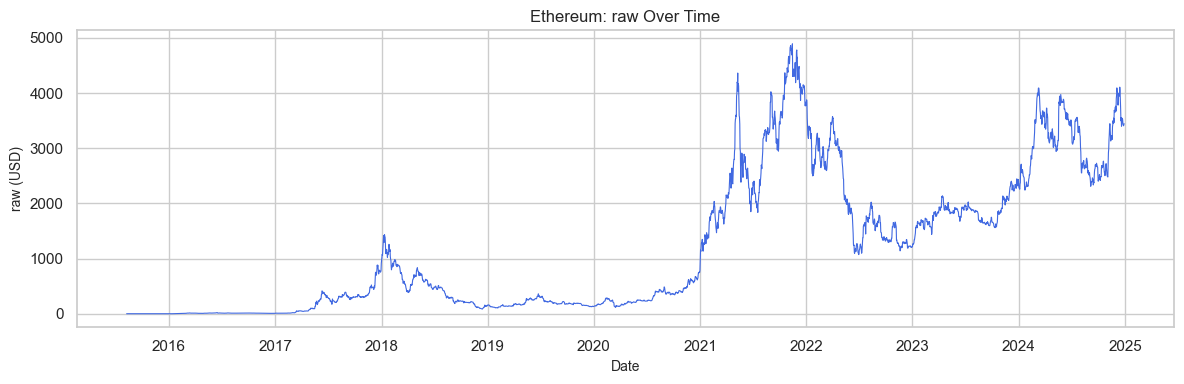

In [21]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook") 

# Make sure data sorted and datetime is proper
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True, errors="coerce")
df = df.sort_values("timeOpen").reset_index(drop=True)

plt.figure(figsize=(12,4))
plt.plot(df["timeOpen"], df[target_name], linewidth=0.8, color="royalblue")
plt.title(f"Ethereum: {TARGET_MODE} Over Time", fontsize=12)  # Updated title
plt.xlabel("Date", fontsize=10)
plt.ylabel(f"{TARGET_MODE} (USD)", fontsize=10)  

# Year ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.tight_layout()
plt.show()


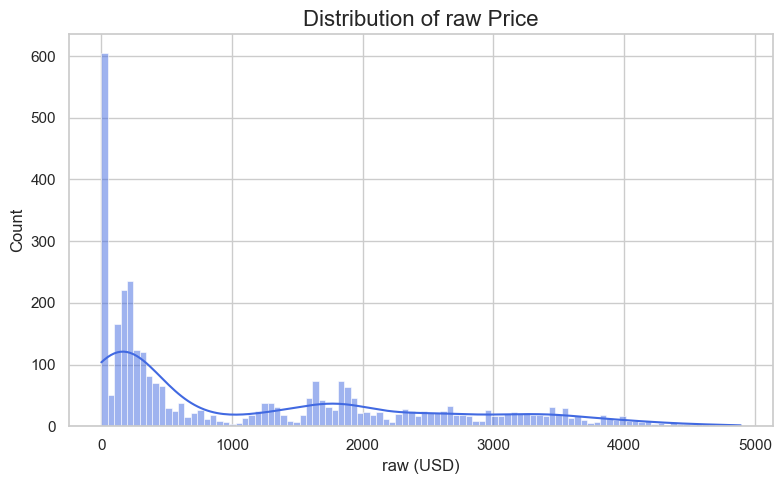

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x=target_name,
    bins=100,
    kde=True,
    color="royalblue"
)
plt.title(f"Distribution of {TARGET_MODE} Price", fontsize=16)
plt.xlabel(f"{TARGET_MODE} (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [23]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.4.5 Create Feature

In [25]:
import numpy as np
import pandas as pd

# --- Ensure correct sorting and types ---
df = df.sort_values("timeOpen").reset_index(drop=True)
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True, errors="coerce")

# --- Price-based features ---
df["daily_return"] = (df["close"] - df["open"]) / df["open"]
df["high_low_range"] = df["high"] - df["low"]
df["close_open_diff"] = df["close"] - df["open"]
df["high_close_gap"] = df["high"] - df["close"]
df["low_close_gap"] = df["close"] - df["low"]

# --- Trend & momentum features ---
for window in [5, 10, 20, 50]:
    df[f"MA{window}"] = df["close"].rolling(window).mean()
df["MA_ratio"] = df["MA5"] / df["MA20"]

df["rolling_std_7d"] = df["close"].rolling(7).std()

# --- RSI (Relative Strength Index) ---
window_rsi = 14
delta = df["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=window_rsi, min_periods=window_rsi).mean()
avg_loss = pd.Series(loss).rolling(window=window_rsi, min_periods=window_rsi).mean()
rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

# --- Time-based features ---
df["day_of_week"] = df["timeOpen"].dt.day_name()
df["month"] = df["timeOpen"].dt.month
df["is_weekend"] = df["timeOpen"].dt.dayofweek >= 5  # Saturday/Sunday True

# --- Volume-related features ---
df["volume_change"] = df["volume"] / df["volume"].shift(1)
df["volume_MA7"] = df["volume"].rolling(7).mean()
df["price_volume_ratio"] = df["close"] / (df["volume"] + 1e-6)
df["volatility_ratio"] = (df["high_low_range"]) / (df["volume"] + 1e-6)

# --- Lag features (shifted) ---
df["close_lag1"] = df["close"].shift(1)
df["close_lag2"] = df["close"].shift(2)
df["open_lag1"] = df["open"].shift(1)
df["open_lag2"] = df["open"].shift(2)
df["high_lag1"] = df["high"].shift(1)
df["high_lag2"] = df["high"].shift(2)
df["low_lag1"] = df["low"].shift(1)
df["low_lag2"] = df["low"].shift(2)

# --- Interaction features ---
df["price_change_ratio"] = (df["close"] - df["open"]) / (df["high"] - df["low"] + 1e-6)

# ======================================================================
#                       ADDITIONAL TECHNICAL INDICATORS
# ======================================================================
_eps = 1e-9

# ===== EMAs & MACD =====
df["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()
df["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["EMA12"] - df["EMA26"]
df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["MACD_hist"] = df["MACD"] - df["MACD_signal"]

# ===== Bollinger Bands (20) =====
bb_window = 20
bb_mid = df["close"].rolling(bb_window, min_periods=bb_window).mean()
bb_std = df["close"].rolling(bb_window, min_periods=bb_window).std()
df["BB_mid_20"] = bb_mid
df["BB_up_20"] = bb_mid + 2 * bb_std
df["BB_low_20"] = bb_mid - 2 * bb_std
df["BB_pctB_20"] = (df["close"] - df["BB_low_20"]) / (df["BB_up_20"] - df["BB_low_20"] + _eps)
df["BB_bw_20"] = (df["BB_up_20"] - df["BB_low_20"]) / (bb_mid + _eps)

# ===== Stochastic Oscillator =====
sto_n = 14
ll = df["low"].rolling(sto_n, min_periods=sto_n).min()
hh = df["high"].rolling(sto_n, min_periods=sto_n).max()
df["STO_K_14"] = 100 * (df["close"] - ll) / (hh - ll + _eps)
df["STO_D_3"] = df["STO_K_14"].rolling(3, min_periods=3).mean()

# ===== True Range & ATR (14) =====
prev_close = df["close"].shift(1)
tr1 = df["high"] - df["low"]
tr2 = (df["high"] - prev_close).abs()
tr3 = (df["low"] - prev_close).abs()
df["TR"] = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
atr_n = 14
df["ATR_14"] = df["TR"].ewm(alpha=1/atr_n, adjust=False).mean()

# ===== Ichimoku Cloud =====
tenkan_n, kijun_n, spanb_n = 9, 26, 52
tenkan = (df["high"].rolling(tenkan_n, min_periods=tenkan_n).max() +
          df["low"].rolling(tenkan_n, min_periods=tenkan_n).min()) / 2.0
kijun = (df["high"].rolling(kijun_n, min_periods=kijun_n).max() +
         df["low"].rolling(kijun_n, min_periods=kijun_n).min()) / 2.0
span_a = ((tenkan + kijun) / 2.0).shift(kijun_n)
span_b = ((df["high"].rolling(spanb_n, min_periods=spanb_n).max() +
           df["low"].rolling(spanb_n, min_periods=spanb_n).min()) / 2.0).shift(kijun_n)
df["ICH_Tenkan_9"] = tenkan
df["ICH_Kijun_26"] = kijun
df["ICH_SpanA"] = span_a
df["ICH_SpanB"] = span_b

# --- Clean up early NaNs from rolling features ---
df = df.dropna().reset_index(drop=True)

# --- Save processed features ---
print(f"Final shape after feature engineering: {df.shape}")
df.head()

Final shape after feature engineering: (3355, 59)


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,...,BB_pctB_20,BB_bw_20,STO_K_14,STO_D_3,TR,ATR_14,ICH_Tenkan_9,ICH_Kijun_26,ICH_SpanA,ICH_SpanB
0,2015-10-24 00:00:00+00:00,2015-10-24T23:59:59.999Z,2015-10-24T17:29:25.000Z,2015-10-24T11:49:26.000Z,2781,0.539681,0.577396,0.518688,0.563590,258356.0,...,0.478059,0.456727,60.235462,54.819983,0.058708,0.080102,0.520182,0.583809,0.861272,1.677936
1,2015-10-25 00:00:00+00:00,2015-10-25T23:59:59.999Z,2015-10-25T19:59:26.000Z,2015-10-25T01:04:27.000Z,2781,0.563207,0.688192,0.561383,0.616039,635384.0,...,0.683746,0.453387,73.006217,61.124743,0.126809,0.083438,0.554545,0.583809,0.861272,1.409471
2,2015-10-26 00:00:00+00:00,2015-10-26T23:59:59.999Z,2015-10-26T23:39:26.000Z,2015-10-26T00:34:25.000Z,2781,0.619743,0.757517,0.597098,0.731317,1089120.0,...,1.051176,0.502502,92.216743,75.152808,0.160419,0.088936,0.589207,0.589207,0.851775,1.409471
3,2015-10-27 00:00:00+00:00,2015-10-27T23:59:59.999Z,2015-10-27T14:04:26.000Z,2015-10-27T00:04:25.000Z,2781,0.708890,0.898172,0.708890,0.869641,1846370.0,...,1.225678,0.668012,94.022102,86.415021,0.189282,0.096104,0.659535,0.659535,0.849168,1.409471
4,2015-10-28 00:00:00+00:00,2015-10-28T23:59:59.999Z,2015-10-28T21:34:26.000Z,2015-10-28T14:49:26.000Z,2781,0.870938,1.055790,0.807857,1.002480,2373050.0,...,1.235832,0.893790,91.603322,92.614055,0.247933,0.106949,0.738343,0.738343,0.832044,1.409471


### C.5 Explore Feature of Interest `\<Volume\>`

In [26]:
df_eda = df.copy()

In [27]:
print("=== Summary stats (Volume) ===")
print(df_eda["volume"].describe())

=== Summary stats (Volume) ===
count    3.355000e+03
mean     1.016331e+10
std      1.074403e+10
min      1.645650e+05
25%      1.517215e+09
50%      7.596176e+09
75%      1.537631e+10
max      8.448291e+10
Name: volume, dtype: float64


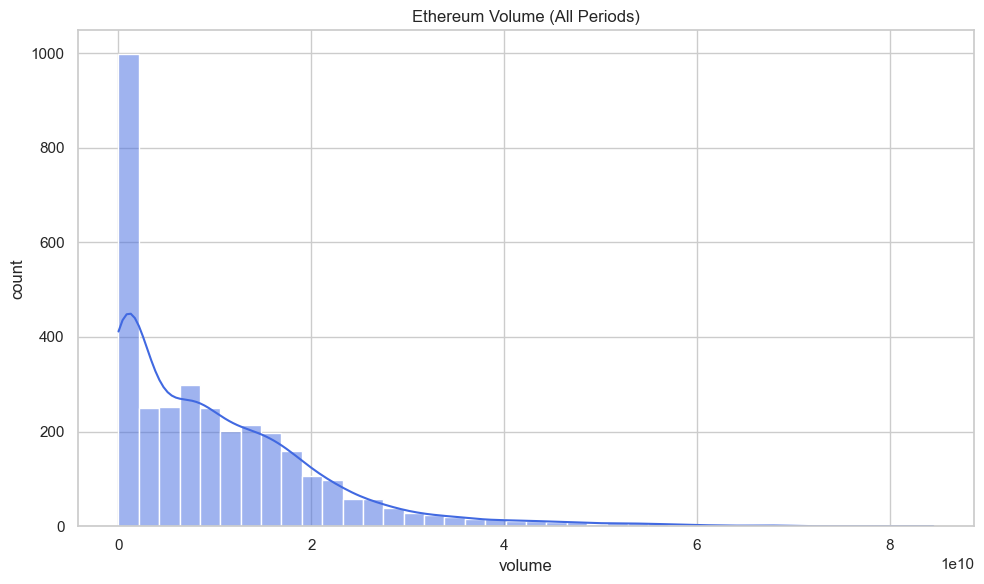

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df_eda["volume"].dropna(), bins=40, kde=True, color="royalblue")
plt.title("Ethereum Volume (All Periods)")
plt.xlabel("volume")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [29]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [30]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `\<Day of week\>`

In [31]:
for col in ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]:
    if col in df_eda.columns:
        df_eda[col] = pd.to_datetime(df_eda[col], utc=True, errors="coerce")

df_eda["dow"] = df_eda["timeOpen"].dt.day_name()           
df_eda["month"] = df_eda["timeOpen"].dt.month_name()        
df_eda["year"] = df_eda["timeOpen"].dt.year

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Iterable, Union, Callable, Dict

_DOW_ORDER = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
_DEF_TIME_COLS = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]

def _ensure_datetime_cols(df: pd.DataFrame, time_cols=tuple(_DEF_TIME_COLS)) -> None:
    for c in time_cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], utc=True, errors="coerce")

def plot_features_by_day(
    df: pd.DataFrame,
    features: Union[str, Iterable[str]],
    *,
    time_col: str = "timeOpen",
    agg: Union[str, Callable] = "mean",
    show_box: bool = True,
    show_bar: bool = True,
    order: Iterable[str] = tuple(_DOW_ORDER),
    palette: str = "viridis",
    showfliers: bool = False,
    figsize_box=(10, 6),
    figsize_bar=(10, 6),
) -> pd.DataFrame:
    """
    Plot selected numeric features by Day-of-Week:
      - Boxplot(s) per feature across DOW
      - Bar chart(s) of aggregated value (mean by default) across DOW
    Returns a DataFrame of aggregated stats indexed by DOW.
    """
    df_eda = df.copy()
    _ensure_datetime_cols(df_eda)

    if time_col not in df_eda.columns:
        raise ValueError(f"time_col '{time_col}' not found")

    # time parts
    df_eda["dow"] = df_eda[time_col].dt.day_name()

    # normalize features list and keep numeric-only
    if isinstance(features, str):
        features = [features]
    features = [f for f in features if f in df_eda.columns]
    if not features:
        raise ValueError("No valid features found in DataFrame")

    num_features = df_eda[features].select_dtypes(include=[np.number]).columns.tolist()
    if not num_features:
        raise ValueError("Selected features are not numeric")
    # drop rows with NaN in any used feature
    used_cols = ["dow"] + num_features
    df_eda = df_eda[used_cols].dropna(axis=0, how="any")

    # aggregated stats by DOW
    dow_stats = (
        df_eda.groupby("dow")[num_features]
              .aggregate(agg)
              .reindex(order)
    )

    # plots
    if show_box:
        for f in num_features:
            plt.figure(figsize=figsize_box)
            sns.boxplot(
                data=df_eda, x="dow", y=f, order=order,
                showfliers=showfliers, palette=palette
            )
            plt.title(f"{f} by Day of Week")
            plt.xlabel("day of week")
            plt.ylabel(f)
            plt.tight_layout()
            plt.show()

    if show_bar:
        for f in num_features:
            plt.figure(figsize=figsize_bar)
            sns.barplot(x=dow_stats.index, y=dow_stats[f], palette=palette)
            plt.title(f"Mean {f} by Day of Week" if agg == "mean" else f"{agg} {f} by Day of Week")
            plt.xlabel("day of week")
            plt.ylabel(f"{agg} {f}")
            plt.tight_layout()
            plt.show()

    return dow_stats

__all__ = ["plot_features_by_day"]

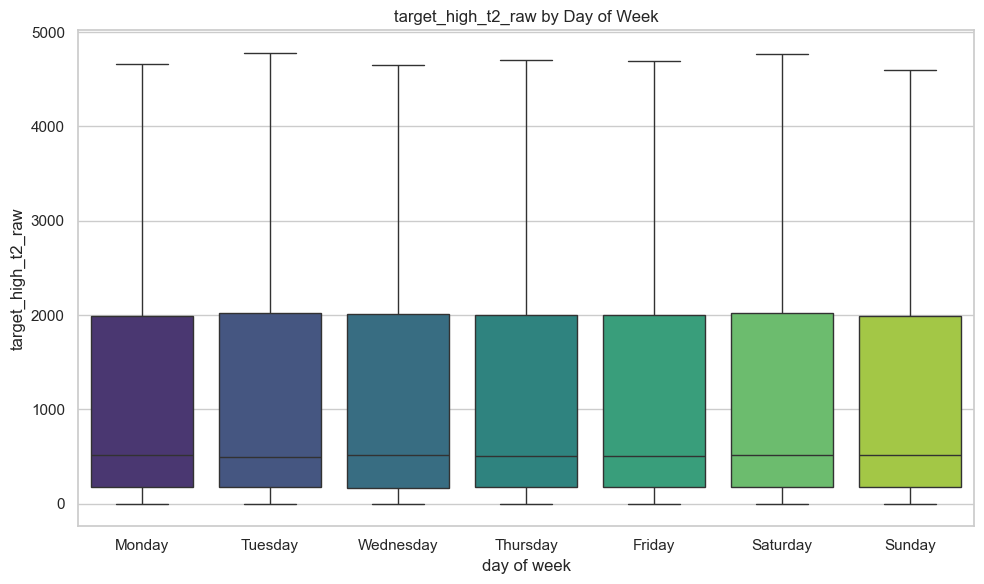

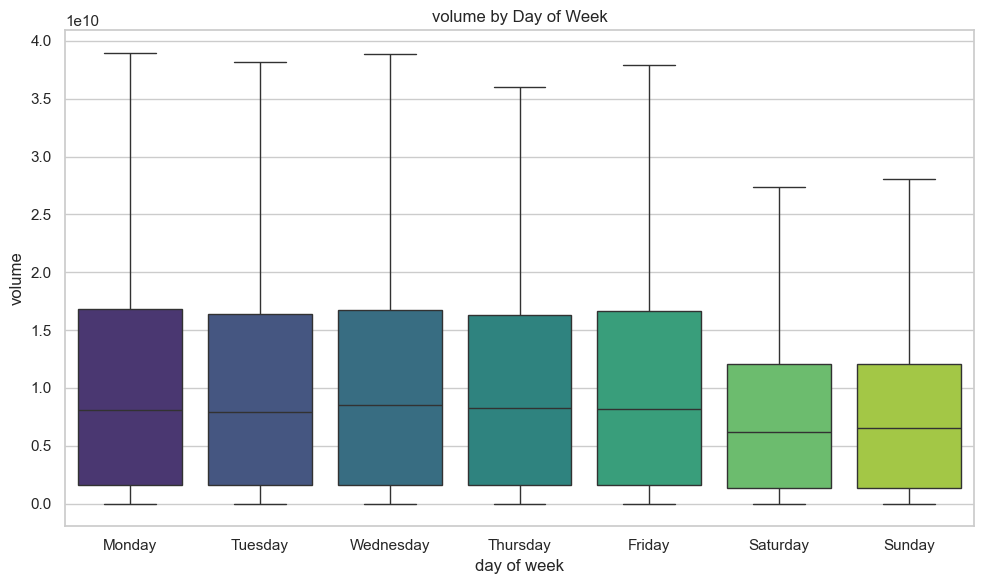

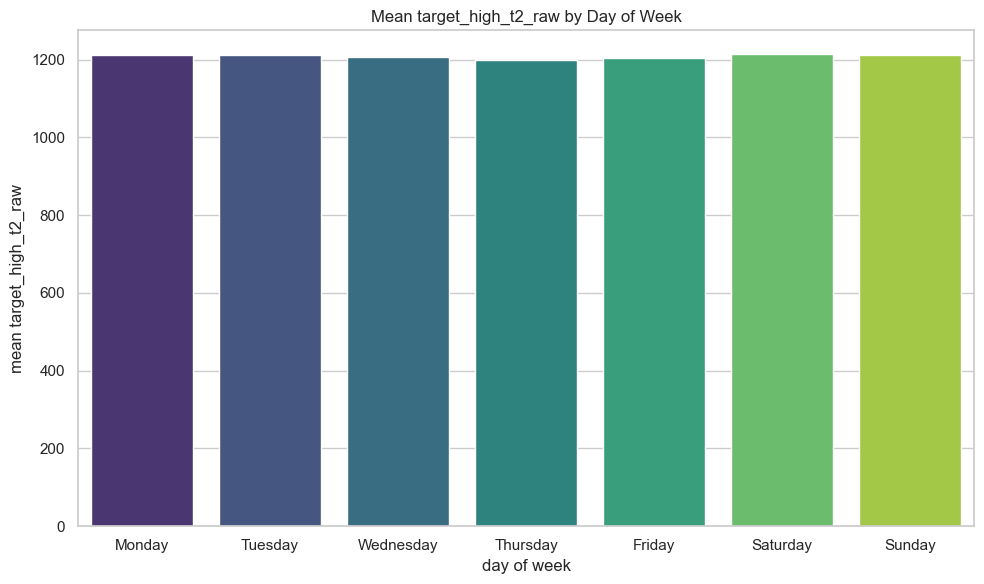

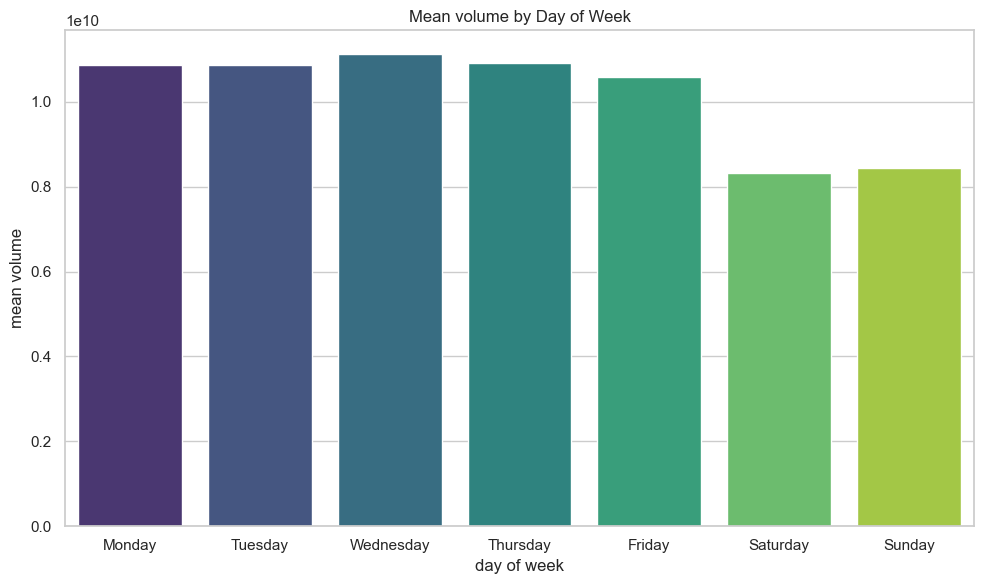

In [33]:
# from adv_mla_at1_25544646.eda.eda_by_day import plot_features_by_day
features = [target_name, "volume"]

# By Day of Week
dow_stats = plot_features_by_day(
    df_eda,
    features=features,
    time_col="timeOpen",
    agg="mean",      
    show_box=True,
    show_bar=True
)

In [34]:
# <Student to fill this section>
feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<Month\>`


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Iterable, Union, Callable

_MONTH_ORDER = ["January","February","March","April","May","June",
                "July","August","September","October","November","December"]
_DEF_TIME_COLS = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]

def _ensure_datetime_cols(df: pd.DataFrame, time_cols=tuple(_DEF_TIME_COLS)) -> None:
    for c in time_cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], utc=True, errors="coerce")

def plot_features_by_month(
    df: pd.DataFrame,
    features: Union[str, Iterable[str]],
    *,
    time_col: str = "timeOpen",
    agg: Union[str, Callable] = "mean",
    show_box: bool = True,
    show_bar: bool = True,
    order: Iterable[str] = tuple(_MONTH_ORDER),
    palette: str = "viridis",
    showfliers: bool = False,
    figsize_box=(12, 6),
    figsize_bar=(12, 6),
    rotate_xticks: int = 30,
) -> pd.DataFrame:
    """
    Plot selected numeric features by Month:
      - Boxplot(s) per feature across months
      - Bar chart(s) of aggregated value (mean by default) across months
    Returns a DataFrame of aggregated stats indexed by month (Jan..Dec).
    """
    df_eda = df.copy()
    _ensure_datetime_cols(df_eda)

    if time_col not in df_eda.columns:
        raise ValueError(f"time_col '{time_col}' not found")

    # time parts
    df_eda["month"] = df_eda[time_col].dt.month_name()

    # normalize features list and keep numeric-only
    if isinstance(features, str):
        features = [features]
    features = [f for f in features if f in df_eda.columns]
    if not features:
        raise ValueError("No valid features found in DataFrame")

    num_features = df_eda[features].select_dtypes(include=[np.number]).columns.tolist()
    if not num_features:
        raise ValueError("Selected features are not numeric")
    # drop rows with NaN in any used feature
    used_cols = ["month"] + num_features
    df_eda = df_eda[used_cols].dropna(axis=0, how="any")

    # aggregated stats by month
    month_stats = (
        df_eda.groupby("month")[num_features]
              .aggregate(agg)
              .reindex(order)
    )

    # plots
    if show_box:
        for f in num_features:
            plt.figure(figsize=figsize_box)
            sns.boxplot(
                data=df_eda, x="month", y=f, order=order,
                showfliers=showfliers, palette=palette
            )
            plt.title(f"{f} by Month")
            plt.xlabel("month")
            plt.ylabel(f)
            plt.xticks(rotation=rotate_xticks, ha="right")
            plt.tight_layout()
            plt.show()

    if show_bar:
        for f in num_features:
            plt.figure(figsize=figsize_bar)
            sns.barplot(x=month_stats.index, y=month_stats[f], palette=palette)
            plt.title(f"Mean {f} by Month" if agg == "mean" else f"{agg} {f} by Month")
            plt.xlabel("month")
            plt.ylabel(f"{agg} {f}")
            plt.xticks(rotation=rotate_xticks, ha="right")
            plt.tight_layout()
            plt.show()

    return month_stats

__all__ = ["plot_features_by_month"]

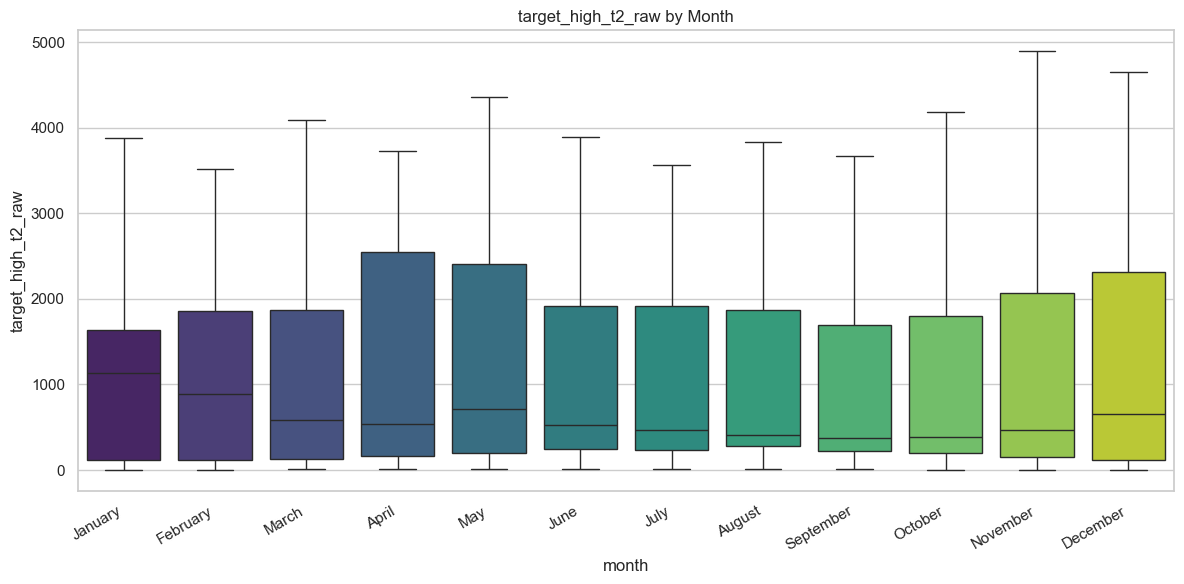

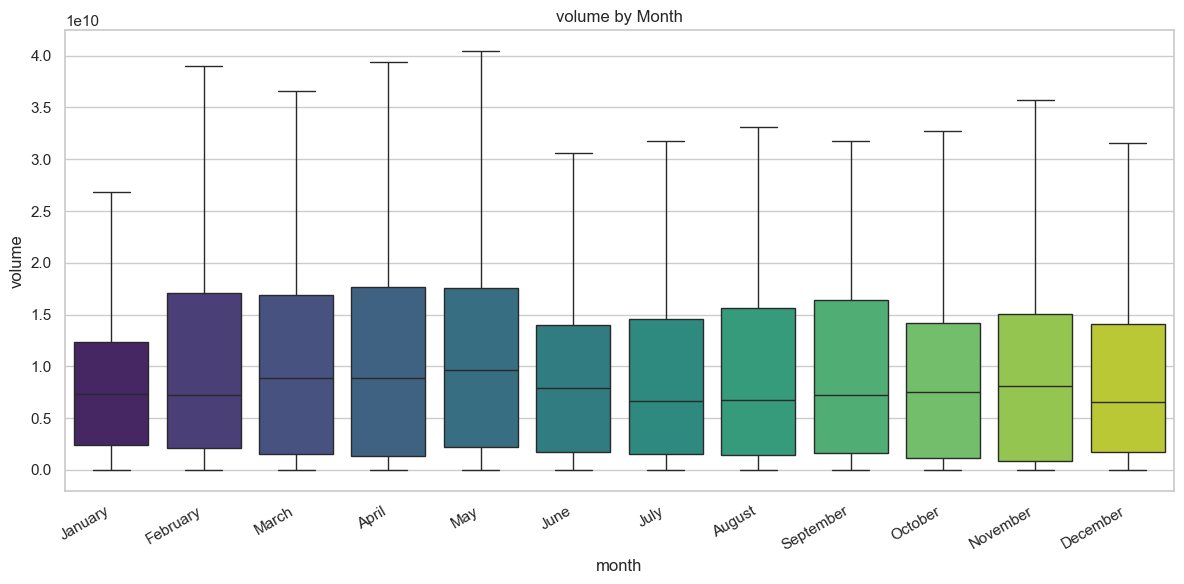

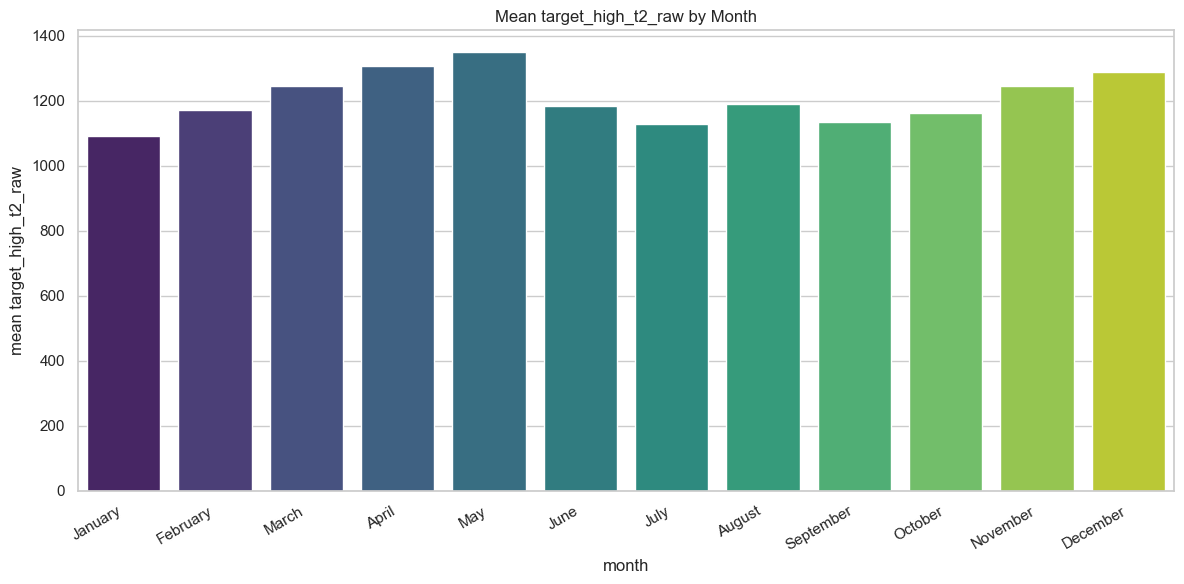

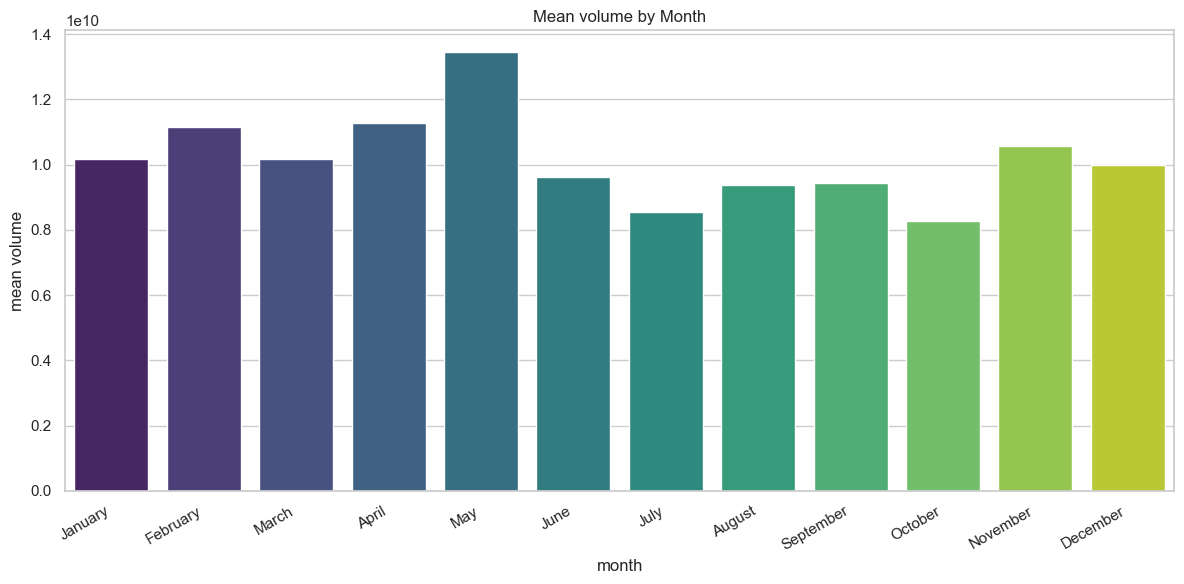

In [37]:
# from adv_mla_at1_25544646.eda.eda_by_month import plot_features_by_month

month_stats = plot_features_by_month(
    df_eda,
    features=features,
    time_col="timeOpen",
    agg="mean",
    show_box=True,
    show_bar=True
)

In [38]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## D. Feature Selection


In [40]:
df_fs = df.copy()

In [41]:
import numpy as np
import pandas as pd

# --- Ensure correct sorting and types ---
df_fs = df_fs.sort_values("timeOpen").reset_index(drop=True)
df_fs["timeOpen"] = pd.to_datetime(df_fs["timeOpen"], utc=True, errors="coerce")

# --- Price-based features ---
df_fs["daily_return"] = (df_fs["close"] - df_fs["open"]) / df_fs["open"]
df_fs["high_low_range"] = df_fs["high"] - df_fs["low"]
df_fs["close_open_diff"] = df_fs["close"] - df_fs["open"]
df_fs["high_close_gap"] = df_fs["high"] - df_fs["close"]
df_fs["low_close_gap"] = df_fs["close"] - df_fs["low"]

# --- Trend & momentum features ---
for window in [5, 10, 20, 50]:
    df_fs[f"MA{window}"] = df_fs["close"].rolling(window).mean()
df_fs["MA_ratio"] = df_fs["MA5"] / df_fs["MA20"]

df_fs["rolling_std_7d"] = df_fs["close"].rolling(7).std()

# --- RSI (Relative Strength Index) ---
window_rsi = 14
delta = df_fs["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=window_rsi, min_periods=window_rsi).mean()
avg_loss = pd.Series(loss).rolling(window=window_rsi, min_periods=window_rsi).mean()
rs = avg_gain / avg_loss
df_fs["RSI"] = 100 - (100 / (1 + rs))

# --- Time-based features ---
df_fs["day_of_week"] = df_fs["timeOpen"].dt.day_name()
df_fs["month"] = df_fs["timeOpen"].dt.month
df_fs["is_weekend"] = df_fs["timeOpen"].dt.dayofweek >= 5  # Saturday/Sunday True

# --- Volume-related features ---
df_fs["volume_change"] = df_fs["volume"] / df_fs["volume"].shift(1)
df_fs["volume_MA7"] = df_fs["volume"].rolling(7).mean()
df_fs["price_volume_ratio"] = df_fs["close"] / (df_fs["volume"] + 1e-6)
df_fs["volatility_ratio"] = (df_fs["high_low_range"]) / (df_fs["volume"] + 1e-6)

# --- Lag features (shifted) ---
df_fs["close_lag1"] = df_fs["close"].shift(1)
df_fs["close_lag2"] = df_fs["close"].shift(2)
df_fs["open_lag1"] = df_fs["open"].shift(1)
df_fs["open_lag2"] = df_fs["open"].shift(2)
df_fs["high_lag1"] = df_fs["high"].shift(1)
df_fs["high_lag2"] = df_fs["high"].shift(2)
df_fs["low_lag1"] = df_fs["low"].shift(1)
df_fs["low_lag2"] = df_fs["low"].shift(2)


# --- Interaction features ---
df_fs["price_change_ratio"] = (df_fs["close"] - df_fs["open"]) / (df_fs["high"] - df_fs["low"] + 1e-6)

# --- Drop early NaNs from rolling features ---
df_fs = df_fs.dropna().reset_index(drop=True)

# --- Save processed features ---
print(f"Final shape after feature engineering: {df_fs.shape}")
df_fs.head()


Final shape after feature engineering: (3306, 59)


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,...,BB_pctB_20,BB_bw_20,STO_K_14,STO_D_3,TR,ATR_14,ICH_Tenkan_9,ICH_Kijun_26,ICH_SpanA,ICH_SpanB
0,2015-12-12 00:00:00+00:00,2015-12-12T23:59:59.999Z,2015-12-12T04:14:32.000Z,2015-12-12T00:14:27.000Z,2781,0.931196,1.045370,0.928546,0.976973,1376280.0,...,1.064400,0.223695,75.117688,73.046320,0.116824,0.073679,0.907929,0.907929,0.900559,0.882973
1,2015-12-13 00:00:00+00:00,2015-12-13T23:59:59.999Z,2015-12-13T03:39:26.000Z,2015-12-13T19:44:28.000Z,2781,0.971538,0.989394,0.937438,0.952884,273614.0,...,0.934033,0.226041,66.354298,80.490662,0.051956,0.072127,0.907929,0.907929,0.921382,0.882973
2,2015-12-14 00:00:00+00:00,2015-12-14T23:59:59.999Z,2015-12-14T07:44:27.000Z,2015-12-14T00:09:29.000Z,2781,0.956620,1.013100,0.950178,0.993022,563436.0,...,1.037120,0.257440,80.956204,74.142730,0.062922,0.071470,0.907929,0.907929,0.911638,0.882973
3,2015-12-15 00:00:00+00:00,2015-12-15T23:59:59.999Z,2015-12-15T11:14:27.000Z,2015-12-15T04:29:32.000Z,2781,0.990589,1.028840,0.982240,1.014150,578618.0,...,1.021137,0.292717,88.642412,78.650971,0.046600,0.069693,0.907929,0.907929,0.917290,0.882973
4,2015-12-16 00:00:00+00:00,2015-12-16T23:59:59.999Z,2015-12-16T01:29:26.000Z,2015-12-16T19:14:31.000Z,2781,1.017110,1.018030,0.974927,0.991182,320767.0,...,0.883501,0.311957,80.286828,83.295148,0.043103,0.067794,0.907929,0.907929,0.934652,0.882973


### D.1 Approach "\<Correlation\>"


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_corr_report(df: pd.DataFrame, target_col=None, top_k: int = 20):
    """
    Print top-k correlations with target_col and plot:
        1) Full correlation heatmap
        2) Focused heatmap on top-k features (by |corr| with target)

    Returns:
        top_corr_features (list): List of top-k feature names (excluding target)
    """
    # Keep only numeric columns
    num_df = df.select_dtypes(include=[np.number])

    # Drop constant columns
    if not num_df.empty:
        num_df = num_df.loc[:, num_df.std(numeric_only=True) > 0]

    # Correlation matrix
    corr_matrix = num_df.corr(numeric_only=True)

    # Correlation with target
    if target_col in corr_matrix.columns:
        corr_with_target = corr_matrix[target_col].sort_values(ascending=False)
        print(f"\n=== Top {top_k} features most correlated with {target_col} ===")
        print(corr_with_target.head(top_k))

        # Top-k by absolute correlation (excluding target itself)
        top_corr_features = (
            corr_with_target.abs()
            .drop(target_col, errors="ignore")
            .sort_values(ascending=False)
            .head(top_k)
            .index
            .tolist()
        )
    else:
        print(f"target column '{target_col}' not found in numeric columns.")
        corr_with_target = None
        top_corr_features = []

    # Full heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(
        corr_matrix,
        cmap="coolwarm",
        center=0,
        square=True,
        linewidths=0.3,
        cbar_kws={'shrink': 0.8},
    )
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Focused heatmap on top-k
    if top_corr_features:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            corr_matrix.loc[top_corr_features, top_corr_features],
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            cbar=False,
        )
        plt.title(f"Top {len(top_corr_features)} Correlated Features (with {target_col})", fontsize=13)
        plt.tight_layout()
        plt.show()

    return top_corr_features



=== Top 20 features most correlated with target_high_t2_raw ===
target_high_t2_raw    1.000000
close                 0.997990
high                  0.997537
marketCap             0.997176
low                   0.996890
close_lag1            0.996595
open                  0.996595
MA5                   0.996270
high_lag1             0.996064
low_lag1              0.995496
open_lag1             0.995107
close_lag2            0.995100
ICH_Tenkan_9          0.994595
high_lag2             0.994526
EMA12                 0.994118
low_lag2              0.994003
MA10                  0.993592
open_lag2             0.993525
EMA26                 0.988526
MA20                  0.988270
Name: target_high_t2_raw, dtype: float64


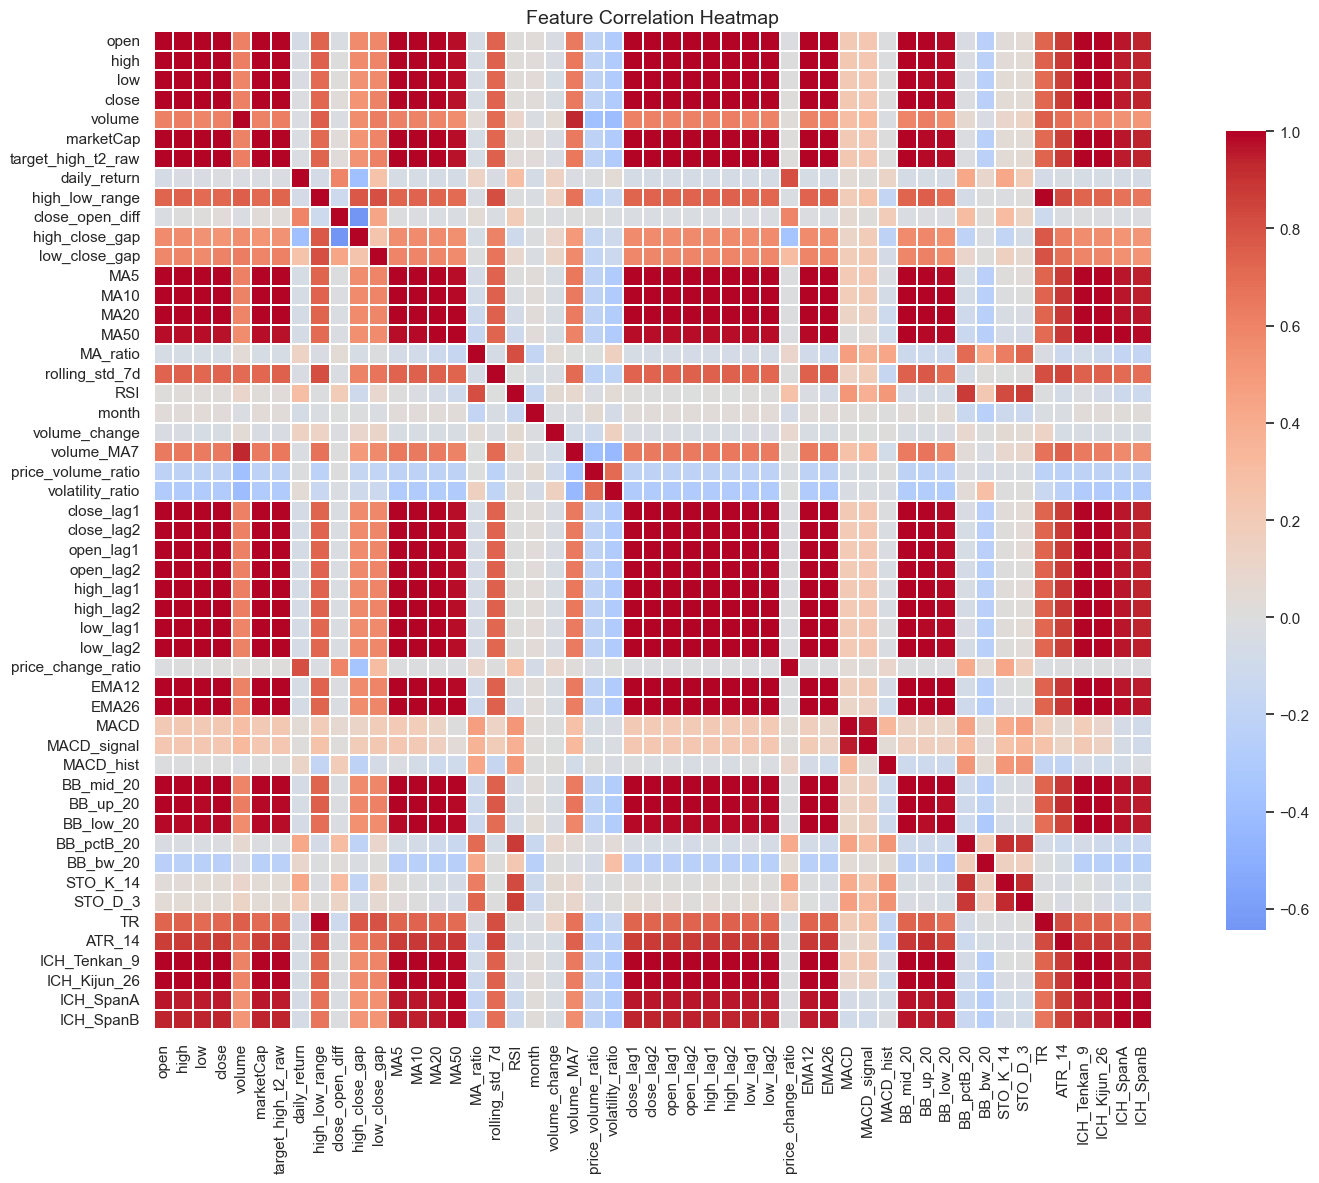

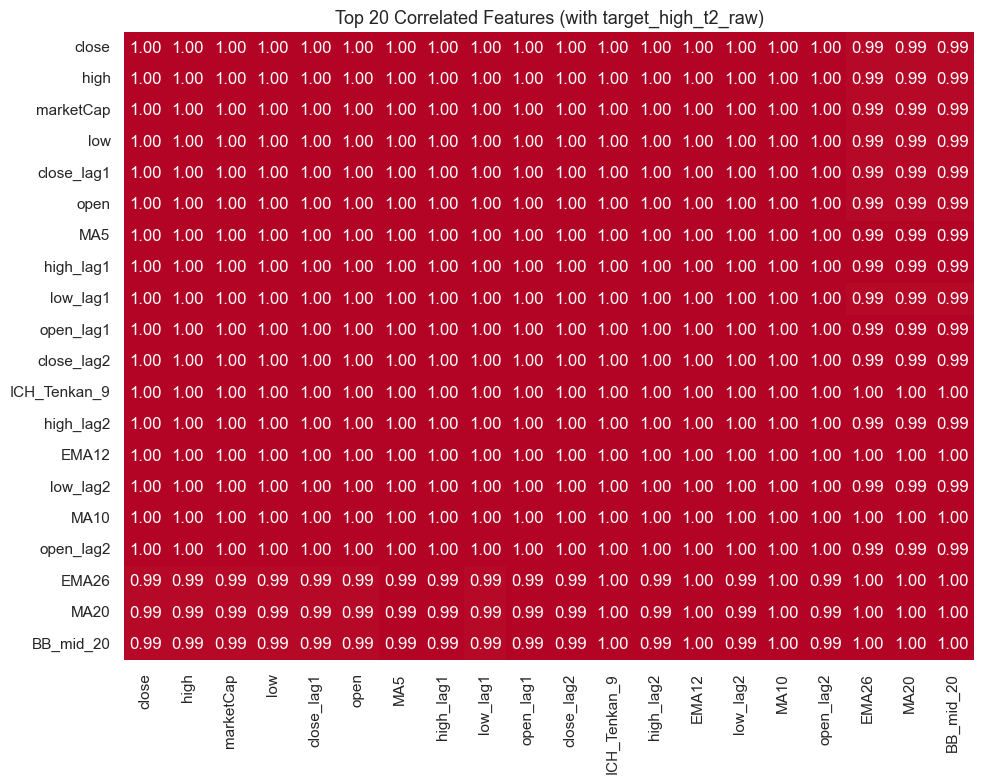

In [43]:
# from adv_mla_at1_25544646.feature_selection.corr_report import plot_corr_report
top_corr_features = plot_corr_report(df_fs, target_col=target_name, top_k=20)

In [44]:
# file: your_package/vif_select.py
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


def run_vif_selection(
    df: pd.DataFrame,
    target_col=None,
    train_frac: float = 0.8,
    vif_threshold: float = 10.0,
    max_iter: int = 100,
    verbose: bool = True,
):
    """
    Simple VIF-based feature selection (TRAIN ONLY), matching your script.

    Steps:
      1) Keep numeric columns, drop target, replace inf with NaN, drop rows with NaN.
      2) First `train_frac` portion is the training slice (time-ordered by current row order).
      3) Remove zero-variance columns.
      4) Greedy VIF elimination until all VIFs <= threshold or max_iter reached.
      5) Print kept columns and final VIFs (like your script) and return details.

    Returns
    -------
    dict with:
      - kept_cols: list[str]
      - final_vifs: pd.Series (VIF per kept column)
      - vif_history: list[pd.Series] (VIFs per iteration, highest-first)
      - X_train: pd.DataFrame (training matrix used for VIF)
    """

    # ----- 0) Prepare numeric matrix (TRAIN ONLY) -----
    dfv = df.copy()

    X_all = (
        dfv.select_dtypes(include=[np.number])
           .drop(columns=[target_col], errors="ignore")
           .replace([np.inf, -np.inf], np.nan)
           .dropna(axis=0, how="any")
    )

    # time-based split by order (first train_frac)
    split_idx = int(len(X_all) * train_frac)
    X_train = X_all.iloc[:split_idx].copy()

    # remove zero-variance columns
    std = X_train.std(numeric_only=True)
    X_train = X_train.loc[:, std > 0]

    # ----- 1) Helpers -----
    def compute_vif(dfX: pd.DataFrame) -> pd.Series:
        X = sm.add_constant(dfX, has_constant="add")
        vifs = []
        # skip constant (index 0)
        for i, col in enumerate(dfX.columns, start=1):
            vifs.append(variance_inflation_factor(X.values, i))
        return pd.Series(vifs, index=dfX.columns, name="VIF").sort_values(ascending=False)

    def vif_elimination(dfX: pd.DataFrame, thresh: float, max_iter: int):
        cols = list(dfX.columns)
        history = []
        for _ in range(max_iter):
            vifs = compute_vif(dfX[cols])
            history.append(vifs)
            worst = vifs.idxmax()
            if vifs.max() <= thresh:
                return cols, vifs, history
            cols.remove(worst)
        # if loop ends, recompute on remaining
        return cols, compute_vif(dfX[cols]), history

    # ----- 2) Run VIF selection -----
    if X_train.shape[1] == 0:
        if verbose:
            print("No columns left after cleaning (numeric + dropna + non-constant).")
        return {"kept_cols": [], "final_vifs": pd.Series(dtype=float), "vif_history": [], "X_train": X_train}

    kept_cols, final_vifs, vif_history = vif_elimination(X_train, thresh=vif_threshold, max_iter=max_iter)

    if verbose:
        print(f"=== Kept features (VIF ≤ {vif_threshold:.1f}) ===")
        print(kept_cols)
        print("\n=== Final VIFs ===")
        print(final_vifs.round(2))

    return {
        "kept_cols": kept_cols,
        "final_vifs": final_vifs,
        "vif_history": vif_history,
        "X_train": X_train[kept_cols].copy(),
    }

In [45]:
# from adv_mla_at1_25544646.feature_selection.vif_select import run_vif_selection

out = run_vif_selection(
    df_fs,
    target_col="target_next_high",  # target variable name
    train_frac=0.8,                 # first 80% of rows used for training
    vif_threshold=10.0              # remove features with VIF > 10
)

=== Kept features (VIF ≤ 10.0) ===
['daily_return', 'high_low_range', 'close_open_diff', 'MA_ratio', 'rolling_std_7d', 'RSI', 'month', 'volume_change', 'volume_MA7', 'price_volume_ratio', 'volatility_ratio', 'price_change_ratio', 'MACD', 'MACD_hist', 'BB_pctB_20', 'BB_bw_20', 'STO_K_14', 'ICH_SpanB']

=== Final VIFs ===
BB_pctB_20            9.37
RSI                   7.49
STO_K_14              6.77
rolling_std_7d        4.73
MA_ratio              4.73
high_low_range        4.48
ICH_SpanB             3.64
daily_return          3.37
price_change_ratio    3.15
volume_MA7            2.92
MACD                  2.03
MACD_hist             1.79
close_open_diff       1.69
BB_bw_20              1.59
volatility_ratio      1.52
price_volume_ratio    1.25
month                 1.13
volume_change         1.13
Name: VIF, dtype: float64


In [46]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results
"""

In [47]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<Select Categorical Feature\>"


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

def mi_feature_ranking(
    df: pd.DataFrame,
    target_col: str = "log_return",
    drop_cols: list | None = None,
    top_k: int = 30,
    n_neighbors: int = 3,
    random_state: int = 42,
):
    """
    Compute mutual information between numeric features and a continuous target,
    print and plot ranked feature importance.
    """
    drop_cols = drop_cols or []

    # --- Prepare X, y ---
    num_df = df.select_dtypes(include=[np.number]).copy()
    if target_col not in num_df.columns:
        raise ValueError(f"Target '{target_col}' not found or not numeric.")
    y = num_df[target_col].astype(float)
    X = num_df.drop(columns=[target_col] + drop_cols, errors="ignore")

    # Drop constant columns
    nunique = X.nunique(dropna=False)
    X = X.drop(columns=nunique[nunique <= 1].index, errors="ignore")

    # Handle NaNs and inf
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))
    y = y.replace([np.inf, -np.inf], np.nan).fillna(y.median())

    # --- Compute MI ---
    mi = mutual_info_regression(
        X.values, y.values, n_neighbors=n_neighbors, random_state=random_state
    )
    mi_scores = pd.Series(mi, index=X.columns, name="MI").sort_values(ascending=False)

    # --- Print ranking ---
    print("Mutual Information Ranking (Top Features):")
    print(mi_scores.head(top_k).to_frame().reset_index().rename(columns={"index": "Feature"}))
    print("\n")

    # --- Plot bar chart ---
    top_mi_features = mi_scores.head(top_k)
    plt.figure(figsize=(10, max(4, 0.35 * len(top_mi_features))))
    plt.barh(top_mi_features.index[::-1], top_mi_features.values[::-1], color="steelblue")
    plt.xlabel("Mutual Information with target")
    plt.ylabel("Feature")
    plt.title(f"Top {len(top_mi_features)} Features by Mutual Information (target = '{target_col}')")
    plt.tight_layout()
    plt.show()

    return mi_scores, top_mi_features.index.tolist()


Mutual Information Ranking (Top Features):
         Feature        MI
0          close  3.154287
1           high  3.049838
2            low  2.974743
3      marketCap  2.968415
4     close_lag1  2.895319
5           open  2.892137
6      high_lag1  2.868714
7            MA5  2.841540
8       low_lag1  2.808059
9   ICH_Tenkan_9  2.758591
10     open_lag1  2.747093
11    close_lag2  2.745471
12         EMA12  2.742568
13     high_lag2  2.726710
14          MA10  2.712171
15      low_lag2  2.667558
16  ICH_Kijun_26  2.643491
17     open_lag2  2.614242
18      BB_up_20  2.584834
19         EMA26  2.579403




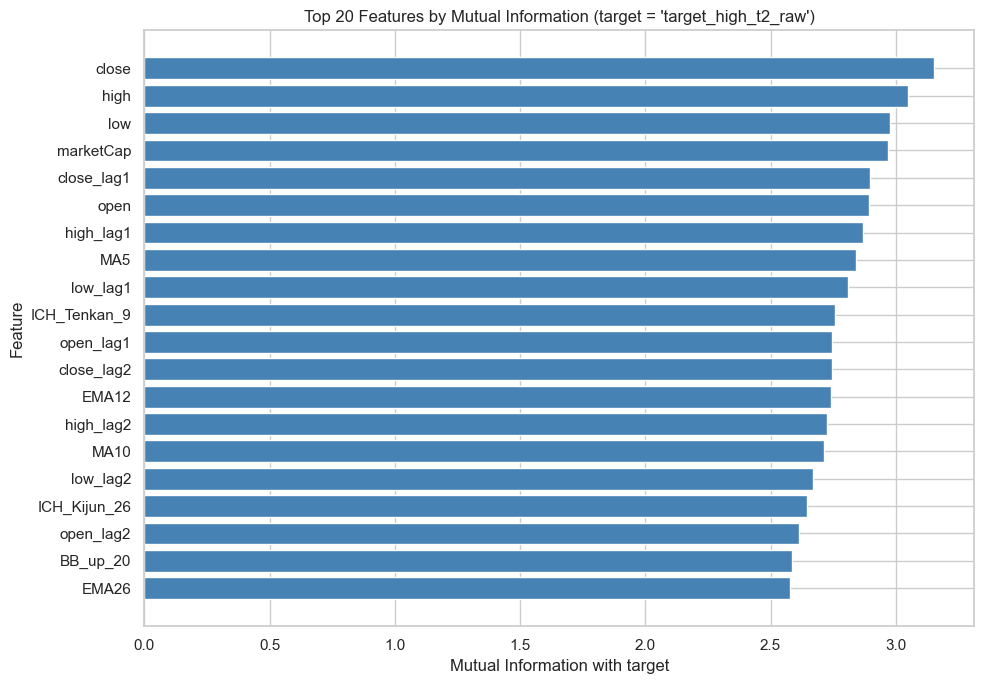

In [49]:
drop_cols = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]

mi_scores, top_mi_features = mi_feature_ranking(
    df=df_fs,
    target_col=target_name,
    drop_cols=drop_cols,
    top_k=20,
)

In [50]:
# <Student to fill this section>
feature_selection_2_insights = """
only pick day of week, is_weekend, and month as categorical features
"""

In [51]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [52]:
# --- Combine without duplicates ---
selected_features = list(dict.fromkeys(top_corr_features + top_mi_features))

print(f"\nFinal combined feature list ({len(selected_features)} unique features):")
print(selected_features)



Final combined feature list (22 unique features):
['close', 'high', 'marketCap', 'low', 'close_lag1', 'open', 'MA5', 'high_lag1', 'low_lag1', 'open_lag1', 'close_lag2', 'ICH_Tenkan_9', 'high_lag2', 'EMA12', 'low_lag2', 'MA10', 'open_lag2', 'EMA26', 'MA20', 'BB_mid_20', 'ICH_Kijun_26', 'BB_up_20']


In [53]:
features_list = selected_features + ['day_of_week', 'is_weekend', 'month', 'timeOpen']

In [54]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

In [56]:
df_prepared = df_fs[features_list + [target_name]].copy()

### E.1 Data Transformation \<Check and Remove Null\>

In [57]:
# Check for null values
null_counts = df_prepared.isnull().sum()
print("=== Null values per column ===")
print(null_counts[null_counts > 0])  # only show columns that have nulls

# Total null count
total_nulls = df_prepared.isnull().sum().sum()
print(f"\nTotal null values in DataFrame: {total_nulls}")

# Remove rows with nulls (if any)
if total_nulls > 0:
    df_prepared = df_prepared.dropna().reset_index(drop=True)
    print(f"\nRemoved rows with nulls. New shape: {df_prepared.shape}")
else:
    print("\nNo null values found. DataFrame is clean.")

=== Null values per column ===
Series([], dtype: int64)

Total null values in DataFrame: 0

No null values found. DataFrame is clean.


In [58]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation \<Remove Duplicates\>

In [60]:
# Check how many duplicate rows exist
dup_count = df_prepared.duplicated().sum()
print(f"Found {dup_count} duplicate rows in df_prepared")

# Remove all duplicate rows
if dup_count > 0:
    df_prepared = df_prepared.drop_duplicates().reset_index(drop=True)
    print(f"Removed {dup_count} duplicates. New shape: {df_prepared.shape}")
else:
    print("No duplicates found. DataFrame is clean.")


Found 0 duplicate rows in df_prepared
No duplicates found. DataFrame is clean.


In [61]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts
"""

In [62]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

---
## F. Feature Engineering

In [63]:
df_eng = df_prepared.copy()

### F.1 New Feature "\<Setup + Core Price/Time/Volume Features\>"


In [64]:
# # --- Ensure correct sorting and types ---
# df = df.sort_values("timeOpen").reset_index(drop=True)
# df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True, errors="coerce")

# # --- Price-based features ---
# df["daily_return"]   = (df["close"] - df["open"]) / df["open"]
# df["high_low_range"] = df["high"] - df["low"]
# df["close_open_diff"]= df["close"] - df["open"]
# df["high_close_gap"] = df["high"] - df["close"]
# df["low_close_gap"]  = df["close"] - df["low"]

# # --- Trend (basic) ---
# for window in [5, 10, 20, 50]:
#     df[f"MA{window}"] = df["close"].rolling(window).mean()
# df["MA_ratio"] = df["MA5"] / df["MA20"]
# df["rolling_std_7d"] = df["close"].rolling(7).std()

# # --- Time-based features ---
# df["day_of_week"] = df["timeOpen"].dt.day_name()
# df["month"]       = df["timeOpen"].dt.month
# df["is_weekend"]  = df["timeOpen"].dt.dayofweek >= 5  # Saturday/Sunday True

# # --- Volume-related features ---
# df["volume_change"]     = df["volume"] / df["volume"].shift(1)
# df["volume_MA7"]        = df["volume"].rolling(7).mean()
# df["price_volume_ratio"]= df["close"] / (df["volume"] + 1e-6)
# df["volatility_ratio"]  = df["high_low_range"] / (df["volume"] + 1e-6)


In [65]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<Technical Indicators (Momentum/Volatility)\>"




In [67]:
# _EPS = 1e-9

# # --- RSI (Relative Strength Index, 14) ---
# window_rsi = 14
# delta = df["close"].diff()
# gain  = np.where(delta > 0, delta, 0.0)
# loss  = np.where(delta < 0, -delta, 0.0)
# avg_gain = pd.Series(gain, index=df.index).rolling(window_rsi, min_periods=window_rsi).mean()
# avg_loss = pd.Series(loss, index=df.index).rolling(window_rsi, min_periods=window_rsi).mean()
# rs = avg_gain / (avg_loss + _EPS)
# df["RSI"] = 100 - (100 / (1 + rs))

# # --- EMAs & MACD ---
# df["EMA12"] = df["close"].ewm(span=12, adjust=False).mean()
# df["EMA26"] = df["close"].ewm(span=26, adjust=False).mean()
# df["MACD"] = df["EMA12"] - df["EMA26"]
# df["MACD_signal"] = df["MACD"].ewm(span=9, adjust=False).mean()
# df["MACD_hist"] = df["MACD"] - df["MACD_signal"]

# # --- Bollinger Bands (20) ---
# bb_window = 20
# bb_mid = df["close"].rolling(bb_window, min_periods=bb_window).mean()
# bb_std = df["close"].rolling(bb_window, min_periods=bb_window).std()
# df["BB_mid_20"] = bb_mid
# df["BB_up_20"]  = bb_mid + 2 * bb_std
# df["BB_low_20"] = bb_mid - 2 * bb_std
# df["BB_pctB_20"] = (df["close"] - df["BB_low_20"]) / (df["BB_up_20"] - df["BB_low_20"] + _EPS)
# df["BB_bw_20"]   = (df["BB_up_20"] - df["BB_low_20"]) / (bb_mid + _EPS)

# # --- Stochastic Oscillator (14) ---
# sto_n = 14
# ll = df["low"].rolling(sto_n, min_periods=sto_n).min()
# hh = df["high"].rolling(sto_n, min_periods=sto_n).max()
# df["STO_K_14"] = 100 * (df["close"] - ll) / (hh - ll + _EPS)
# df["STO_D_3"]  = df["STO_K_14"].rolling(3, min_periods=3).mean()

# # --- True Range & ATR (14) ---
# prev_close = df["close"].shift(1)
# tr1 = df["high"] - df["low"]
# tr2 = (df["high"] - prev_close).abs()
# tr3 = (df["low"] - prev_close).abs()
# df["TR"] = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
# atr_n = 14
# df["ATR_14"] = df["TR"].ewm(alpha=1/atr_n, adjust=False).mean()

# # --- Ichimoku Cloud ---
# tenkan_n, kijun_n, spanb_n = 9, 26, 52
# tenkan = (df["high"].rolling(tenkan_n, min_periods=tenkan_n).max() +
#           df["low"].rolling(tenkan_n, min_periods=tenkan_n).min()) / 2.0
# kijun  = (df["high"].rolling(kijun_n, min_periods=kijun_n).max() +
#           df["low"].rolling(kijun_n, min_periods=kijun_n).min()) / 2.0
# span_a = ((tenkan + kijun) / 2.0).shift(kijun_n)
# span_b = ((df["high"].rolling(spanb_n, min_periods=spanb_n).max() +
#            df["low"].rolling(spanb_n, min_periods=spanb_n).min()) / 2.0).shift(kijun_n)
# df["ICH_Tenkan_9"] = tenkan
# df["ICH_Kijun_26"] = kijun
# df["ICH_SpanA"]    = span_a
# df["ICH_SpanB"]    = span_b


In [68]:
# <Student to fill this section>
feature_engineering_2_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [69]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<Lags, Interactions, Cleanup\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [70]:
# # --- Lag features ---
# df["close_lag1"] = df["close"].shift(1)
# df["close_lag2"] = df["close"].shift(2)
# df["open_lag1"]  = df["open"].shift(1)
# df["open_lag2"]  = df["open"].shift(2)
# df["high_lag1"]  = df["high"].shift(1)
# df["high_lag2"]  = df["high"].shift(2)
# df["low_lag1"]   = df["low"].shift(1)
# df["low_lag2"]   = df["low"].shift(2)

# # --- Interaction features ---
# df["price_change_ratio"] = (df["close"] - df["open"]) / (df["high"] - df["low"] + 1e-6)

# # --- Clean up early NaNs from rolling/shifted features ---
# df = df.dropna().reset_index(drop=True)

# print(f"Final shape after feature engineering: {df.shape}")
# df.head()


In [71]:
# <Student to fill this section>
feature_engineering_n_explanations = """
Provide some explanations on why you believe it is important to create this feature and its impacts
"""

In [72]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [73]:
# adv_mla_at3_25544646/cv/splits.py
from __future__ import annotations
from typing import List, Dict, Optional, Literal, Iterable, Tuple
import numpy as np
import pandas as pd

__all__ = [
    "holdout_tail",
    "time_cv_splits",
    "get_fold_xy",
    "get_fold_xy_te",
    "print_splits",
]

# ----------------------------- Holdout (final test) -----------------------------
def holdout_tail(
    df: pd.DataFrame,
    *,
    test_size: int,
    time_col: str = "timeOpen",
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split df into (df_trainval, df_test) by reserving the last `test_size` rows.
    Keeps time order and returns copies.
    """
    if test_size < 1:
        raise ValueError("test_size must be >= 1")
    if time_col not in df.columns:
        raise ValueError(f"time_col '{time_col}' not found")

    df_ = df.sort_values(time_col).reset_index(drop=True)
    n = len(df_)
    if test_size >= n:
        raise ValueError(f"test_size ({test_size}) must be < number of rows ({n})")

    return df_.iloc[:-test_size].copy(), df_.iloc[-test_size:].copy()


# ------------------------- Rolling / Expanding CV splits -------------------------
def time_cv_splits(
    df: pd.DataFrame,
    *,
    time_col: str = "timeOpen",
    train_size: int,
    val_size: int,
    step: Optional[int] = None,
    mode: Literal["rolling", "expanding"] = "rolling",
    min_train: Optional[int] = None,
    drop_last_incomplete: bool = True,
    gap: int = 0,
) -> List[Dict]:
    """
    Walk-forward splits for time series.

    mode="rolling": fixed-length train window that slides by `step`.
    mode="expanding": train grows from the start; minimum size = min_train.

    A gap of `gap` rows is placed BETWEEN the end of train and start of val:
      train: [start_train, end_train)
      val:   [end_train + gap, end_train + gap + val_size)

    Returns a list[dict]:
      { 'fold','train_idx','val_idx','train_start','train_end','val_start','val_end' }
    """
    # ---- validation ----
    if time_col not in df.columns:
        raise ValueError(f"time_col '{time_col}' not found")
    if train_size < 1 or val_size < 1:
        raise ValueError("train_size and val_size must be >= 1")
    if gap < 0:
        raise ValueError("gap must be >= 0")

    df_ = df.sort_values(time_col).reset_index(drop=True).copy()
    n = len(df_)
    if n < train_size + gap + val_size:
        raise ValueError(
            f"Not enough rows ({n}) for train_size={train_size}, gap={gap}, val_size={val_size}"
        )

    step = int(step or val_size)
    if step < 1:
        raise ValueError("step must be >= 1")

    if mode == "expanding":
        min_train = int(min_train or train_size)
        if min_train < 1:
            raise ValueError("min_train must be >= 1 for expanding mode")

    splits: List[Dict] = []
    k = 0
    start_train = 0

    while True:
        end_train = start_train + train_size
        if mode == "expanding" and end_train < (min_train or train_size):
            end_train = (min_train or train_size)

        # validation window begins after the gap
        val_start = end_train + gap
        val_end = val_start + val_size

        # bounds
        if val_start >= n:
            break
        if val_end > n:
            if drop_last_incomplete:
                break
            val_end = n
            if val_end <= val_start:
                break

        # indices
        train_start_idx = 0 if mode == "expanding" else start_train
        if train_start_idx >= end_train:
            break

        train_idx = np.arange(train_start_idx, end_train, dtype=np.int64)
        val_idx = np.arange(val_start, val_end, dtype=np.int64)

        if len(train_idx) == 0 or len(val_idx) == 0:
            break

        splits.append({
            "fold": k,
            "train_idx": train_idx,
            "val_idx": val_idx,
            "train_start": df_.loc[int(train_idx[0]), time_col],
            "train_end":   df_.loc[int(train_idx[-1]), time_col],
            "val_start":   df_.loc[int(val_idx[0]), time_col],
            "val_end":     df_.loc[int(val_idx[-1]), time_col],
        })

        # advance
        k += 1
        start_train += step
        if mode == "expanding":
            # grow next round: the end of this train becomes the new size
            train_size = end_train

        # stop if next start cannot fit at least one val row
        if start_train + train_size + gap + 1 >= n:
            break

    return splits


# --------------------------- Extraction helpers (XY) ---------------------------
def get_fold_xy(
    df: pd.DataFrame,
    split: Dict,
    features: Iterable[str],
    target: str,
    *,
    drop_time_cols: bool = True,
    time_cols: Iterable[str] = ("timeOpen","timeClose","timeHigh","timeLow","timestamp"),
):
    """
    Return X_train, y_train, X_val, y_val for one split (copies).
    """
    tr, va = split["train_idx"], split["val_idx"]
    X_train = df.loc[tr, list(features)].copy()
    y_train = df.loc[tr, target].copy()
    X_val   = df.loc[va, list(features)].copy()
    y_val   = df.loc[va, target].copy()

    if drop_time_cols:
        drop_cols = [c for c in time_cols if c in X_train.columns]
        if drop_cols:
            X_train = X_train.drop(columns=drop_cols, errors="ignore")
            X_val   = X_val.drop(columns=drop_cols, errors="ignore")

    return X_train, y_train, X_val, y_val


def get_fold_xy_te(
    df_trainval: pd.DataFrame,
    df_test: pd.DataFrame,
    split: Dict,
    features: Iterable[str],
    target: str,
    *,
    drop_time_cols: bool = True,
    time_cols: Iterable[str] = ("timeOpen","timeClose","timeHigh","timeLow","timestamp"),
):
    """
    Return X_train, y_train, X_val, y_val, X_test, y_test for a given fold.
    Test set is the held-out tail (df_test), completely unseen during CV.
    """
    # train/val from rolling CV
    X_train, y_train, X_val, y_val = get_fold_xy(
        df_trainval, split, features, target,
        drop_time_cols=drop_time_cols, time_cols=time_cols
    )

    # test (final holdout)
    X_test = df_test[list(features)].copy()
    y_test = df_test[target].copy()

    if drop_time_cols:
        drop_cols = [c for c in time_cols if c in X_test.columns]
        if drop_cols:
            X_test = X_test.drop(columns=drop_cols, errors="ignore")

    return X_train, y_train, X_val, y_val, X_test, y_test


# --------------------------------- Pretty print --------------------------------
def print_splits(splits: List[Dict], max_rows: int = 3) -> None:
    """Quick preview of first few folds."""
    print(f"Created {len(splits)} folds")
    for s in splits[:max_rows]:
        ts = getattr(s["train_start"], "date", lambda: s["train_start"])()
        te = getattr(s["train_end"],   "date", lambda: s["train_end"])()
        vs = getattr(s["val_start"],   "date", lambda: s["val_start"])()
        ve = getattr(s["val_end"],     "date", lambda: s["val_end"])()
        print(f"Fold {s['fold']}: train {ts} → {te} | val {vs} → {ve}")


In [74]:
# from adv_mla_at3_25544646.cv import (
#     holdout_tail, time_cv_splits, get_fold_xy_te, print_splits
# )

# 0) Ensure sorted once
df_eng = df_eng.sort_values("timeOpen").reset_index(drop=True)

# 1) Create final test holdout (~9% of 3306 rows)
TEST_SIZE = 300
df_trainval, df_test = holdout_tail(df_eng, test_size=TEST_SIZE, time_col="timeOpen")

df_test = df_test.reset_index(drop=True)

# 2) Build rolling CV splits with a gap for your horizon (TARGET_HORIZON=2)
splits = time_cv_splits(
    df_trainval,
    time_col="timeOpen",
    train_size=1200,   
    val_size=60,       
    step=60,           
    mode="rolling",
    gap=2,             # protects horizon
)

print_splits(splits)

# 3) Extract data for the most recent fold + test
last_split = splits[-1]
X_tr, y_tr, X_va, y_va, X_te, y_te = get_fold_xy_te(
    df_trainval=df_trainval,
    df_test=df_test,
    split=last_split,
    features=features_list,
    target=target_name,
)

print("Shapes →", "Train:", X_tr.shape, "| Val:", X_va.shape, "| Test:", X_te.shape)

Created 30 folds
Fold 0: train 2015-12-12 → 2019-03-25 | val 2019-03-28 → 2019-05-26
Fold 1: train 2016-02-10 → 2019-05-24 | val 2019-05-27 → 2019-07-25
Fold 2: train 2016-04-10 → 2019-07-23 | val 2019-07-26 → 2019-09-23
Shapes → Train: (1200, 25) | Val: (60, 25) | Test: (300, 25)


In [75]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset
"""

In [76]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<Encode Month and day of week and Add cyclical time feature \>"

In [77]:
import numpy as np
import pandas as pd

def encode_month_dow_inplace(df: pd.DataFrame, features_list=None, time_col="timeOpen"):
    # ---- get month (1..12) ----
    if "month" in df.columns:
        # if duplicates exist, take the rightmost one
        month = df.loc[:, df.columns == "month"].iloc[:, -1]
    else:
        month = pd.to_datetime(df[time_col], utc=True, errors="coerce").dt.month

    # ---- get day_of_week (Monday..Sunday) ----
    if "day_of_week" in df.columns:
        dow = df.loc[:, df.columns == "day_of_week"].iloc[:, -1]
    else:
        dow = pd.to_datetime(df[time_col], utc=True, errors="coerce").dt.day_name()

    # ---- encode ----
    df["month_sin"] = np.sin(2 * np.pi * month / 12)
    df["month_cos"] = np.cos(2 * np.pi * month / 12)

    day_to_num = {"Monday":0,"Tuesday":1,"Wednesday":2,"Thursday":3,"Friday":4,"Saturday":5,"Sunday":6}
    dow_num = dow.map(day_to_num)
    df["dow_sin"] = np.sin(2 * np.pi * dow_num / 7)
    df["dow_cos"] = np.cos(2 * np.pi * dow_num / 7)

    # ---- clean up ----
    for c in ["month","day_of_week","dow_num"]:
        if c in df.columns:
            # drop all duplicates of that name
            df.drop(columns=[col for col in df.columns if col == c], inplace=True, errors="ignore")

    # ---- keep features_list in sync ----
    if features_list is not None:
        for c in ["month","day_of_week","dow_num"]:
            while c in features_list:
                features_list.remove(c)
        for c in ["month_sin","month_cos","dow_sin","dow_cos"]:
            if c not in features_list:
                features_list.append(c)


In [78]:
for c in ["month", "day_of_week"]:
    if c in features_list:
        features_list.remove(c)

encode_month_dow_inplace(X_tr)
encode_month_dow_inplace(X_va)
encode_month_dow_inplace(X_te)

# Make sure your features_list matches:
for c in ["month","day_of_week"]:
    if c in features_list:
        features_list.remove(c)
for c in ["month_sin","month_cos","dow_sin","dow_cos"]:
    if c not in features_list:
        features_list.append(c)


In [79]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [80]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<Remove time columns before feeding to the model\>"

In [81]:
# time_cols = ["timeOpen", "timeClose", "timeHigh", "timeLow", "timestamp"]
# X_tr = X_tr.drop(columns=[c for c in time_cols if c in X_tr.columns], errors="ignore")
# X_va = X_va.drop(columns=[c for c in time_cols if c in X_va.columns], errors="ignore")
# X_te = X_te.drop(columns=[c for c in time_cols if c in X_te.columns], errors="ignore")

In [82]:
# <Student to fill this section>
data_transformation_2_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [83]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [84]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'X_train' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [85]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def regression_metrics(y_true, y_pred, target_mode=None):
    """
    Compute regression metrics:
      - MAE, RMSE, R², MAPE, and Pearson correlation.
    Works for both price (raw) and return/log_return targets.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    results = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
    }

    # Mean Absolute Percentage Error (avoid divide by zero)
    nonzero = y_true != 0
    if nonzero.sum() > 0:
        mape = np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100
        results["MAPE (%)"] = mape

    # Pearson correlation between predicted and actual
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    results["Correlation"] = corr

    return results

# === Example usage ===
# y_pred_va = model.predict(X_va)
# metrics_val = regression_metrics(y_va, y_pred_va, target_mode=TARGET_MODE)
# metrics_test = regression_metrics(y_te, y_pred_te, target_mode=TARGET_MODE)

# print("Validation metrics:\n", pd.Series(metrics_val))
# print("\nTest metrics:\n", pd.Series(metrics_test))


In [86]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate
"""

In [87]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

In [88]:
# ===== Baseline predictors & evaluation =====
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def _rmse(y_true, y_pred):
    return float(root_mean_squared_error(y_true, y_pred))

def _mape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.maximum(np.abs(y_true), eps)
    return float(np.mean(np.abs((y_true - y_pred) / denom)) * 100.0)

def _price_to_target(yhat_price: pd.Series, close_series: pd.Series, target_mode: str) -> pd.Series:
    """Map a predicted future HIGH price back to the target space."""
    if target_mode == "raw":
        return yhat_price
    elif target_mode == "return":
        return (yhat_price / close_series) - 1.0
    elif target_mode == "diff":
        return yhat_price - close_series
    elif target_mode == "log_return":
        return np.log(yhat_price) - np.log(close_series)
    else:
        raise ValueError(f"Unknown TARGET_MODE: {target_mode}")

def _make_baseline_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Create simple baseline columns based on information available at time t."""
    out = pd.DataFrame(index=df.index)
    out["BL_persist_high"] = df["high"]                 # ŷ = high_t
    out["BL_close"]        = df["close"]                # ŷ = close_t
    out["BL_ma5_high"]     = df["high"].rolling(5).mean()
    out["BL_ma10_high"]    = df["high"].rolling(10).mean()
    return out

def _evaluate_split(
    df_source: pd.DataFrame,
    idx: np.ndarray,
    target_col: str,
    target_mode: str,
    label: str
) -> pd.DataFrame:
    """
    Build baseline predictions for the given rows (idx) of df_source
    and return a score table for that slice.
    """
    # Baseline raw-price predictors at time t
    bl = _make_baseline_columns(df_source).iloc[idx].copy()
    close_t = df_source.loc[idx, "close"]
    y_true  = df_source.loc[idx, target_col]

    # Map each price-baseline to the target space
    preds = {}
    for col in bl.columns:
        # Some baselines (MA) have NaNs at the start; drop rows with NaN in this baseline
        mask = bl[col].notna()
        yhat_price = bl.loc[mask, col]
        yhat_tgt   = _price_to_target(yhat_price, close_t.loc[mask], target_mode)

        y_true_m   = y_true.loc[mask]
        preds[col] = {
            "n": int(mask.sum()),
            "MAE":  float(mean_absolute_error(y_true_m, yhat_tgt)),
            "RMSE": _rmse(y_true_m, yhat_tgt),
            "MAPE%": _mape(y_true_m, yhat_tgt),
            "R2":   float(r2_score(y_true_m, yhat_tgt)) if len(y_true_m) > 1 else np.nan,
        }

    df_scores = (
        pd.DataFrame(preds).T
        .reset_index()
        .rename(columns={"index": "Baseline"})
        .assign(Slice=label)
        .loc[:, ["Slice","Baseline","n","MAE","RMSE","MAPE%","R2"]]
        .sort_values(["Slice","RMSE"], ascending=[True, True])
        .reset_index(drop=True)
    )
    return df_scores

# ---------- Run baselines on your current split ----------
tr_idx = last_split["train_idx"]
va_idx = last_split["val_idx"]

scores_tr = _evaluate_split(df_trainval, tr_idx, target_name, TARGET_MODE, label="Train")
scores_va = _evaluate_split(df_trainval, va_idx, target_name, TARGET_MODE, label="Val")

# Test slice uses the held-out tail
scores_te = _evaluate_split(df_test, df_test.index.values, target_name, TARGET_MODE, label="Test")

baseline_report = pd.concat([scores_tr, scores_va, scores_te], axis=0)
print("\n=== Baseline scorecard (target mode =", TARGET_MODE, f", horizon = t+{TARGET_HORIZON}) ===")
print(baseline_report.to_string(index=False))



=== Baseline scorecard (target mode = raw , horizon = t+2) ===
Slice        Baseline      n        MAE       RMSE    MAPE%       R2
Train BL_persist_high 1200.0  80.601540 122.975557 3.823858 0.984482
Train        BL_close 1200.0  84.978094 127.106500 3.988366 0.983422
Train     BL_ma5_high 1200.0 110.000301 164.685557 5.240823 0.972170
Train    BL_ma10_high 1200.0 142.212161 211.567375 6.690438 0.954070
  Val BL_persist_high   60.0  88.415951 114.167265 3.295542 0.894091
  Val        BL_close   60.0  93.331283 123.464533 3.407169 0.876139
  Val     BL_ma5_high   60.0 129.102945 164.715157 4.730400 0.779546
  Val    BL_ma10_high   60.0 174.932123 213.194591 6.350709 0.630680
 Test BL_persist_high  300.0 100.077090 137.250837 3.137528 0.923000
 Test        BL_close  300.0 107.197292 145.445346 3.316804 0.913532
 Test     BL_ma5_high  296.0 135.680055 187.167538 4.269000 0.854108
 Test    BL_ma10_high  291.0 171.441526 228.215029 5.376944 0.775297


### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
"""

In [91]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [92]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error, r2_score
)

# -----------------------------
# 1) Build CV set = train + val (rolling split indices)
# -----------------------------
X_cv = pd.concat([X_tr, X_va], axis=0)
y_cv = pd.concat([y_tr, y_va], axis=0)

train_idx = np.arange(len(X_tr))
val_idx   = np.arange(len(X_tr), len(X_cv))
cv_split = [(train_idx, val_idx)]  # single rolling split

# -----------------------------
# 2) Pipeline and search space
# -----------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())  # placeholder; will be swapped by search
])

param_dist = {
    "model": [Ridge(), Lasso(max_iter=10000)],
    "model__alpha": np.logspace(-4, 2, 200),   # 1e-4 .. 1e2
    "model__fit_intercept": [True, False],
}

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="neg_root_mean_squared_error",
    cv=cv_split,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True,   # refit on the full X_cv, y_cv using best params
)

search.fit(X_cv, y_cv)

print("\n=== Best Model (Ridge or Lasso) ===")
print("Best CV RMSE:", -search.best_score_)
print("Best Params:", search.best_params_)
print("Best Estimator:", search.best_estimator_)

# -----------------------------
# 3) Evaluate on validation (same val part of rolling split)
# -----------------------------
best_model = search.best_estimator_

y_va_pred = best_model.predict(X_va)
rmse_va = root_mean_squared_error(y_va, y_va_pred)
mae_va  = mean_absolute_error(y_va, y_va_pred)
mape_va = mean_absolute_percentage_error(y_va, y_va_pred)
r2_va   = r2_score(y_va, y_va_pred)

print("\n=== Validation Performance ===")
print(f"RMSE: {rmse_va:.6f}")
print(f"MAE : {mae_va:.6f}")
print(f"MAPE: {mape_va:.6f}")
print(f"R²  : {r2_va:.6f}")

# -----------------------------
# 4) Predict on test (and score if y_te is available)
# -----------------------------
y_te_pred = best_model.predict(X_te)

print("\n=== Test Predictions ===")
print("y_te_pred shape:", y_te_pred.shape)

# If you have y_te, report metrics:
try:
    rmse_te = root_mean_squared_error(y_te, y_te_pred)
    mae_te  = mean_absolute_error(y_te, y_te_pred)
    mape_te = mean_absolute_percentage_error(y_te, y_te_pred)
    r2_te   = r2_score(y_te, y_te_pred)
    print("\n=== Test Performance ===")
    print(f"RMSE: {rmse_te:.6f}")
    print(f"MAE : {mae_te:.6f}")
    print(f"MAPE: {mape_te:.6f}")
    print(f"R²  : {r2_te:.6f}")
except NameError:
    pass   

Fitting 1 folds for each of 40 candidates, totalling 40 fits


/Users/kittituchwongwatchrapaiboon/Library/Caches/pypoetry/virtualenvs/amla-at3-group13-A_7tXfun-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.213e+06, tolerance: 1.169e+05
  model = cd_fast.enet_coordinate_descent(
/Users/kittituchwongwatchrapaiboon/Library/Caches/pypoetry/virtualenvs/amla-at3-group13-A_7tXfun-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.591e+08, tolerance: 6.427e+05
  model = cd_fast.enet_coordinate_descent(



=== Best Model (Ridge or Lasso) ===
Best CV RMSE: 94.30802472504124
Best Params: {'model__fit_intercept': True, 'model__alpha': np.float64(0.22219468609395238), 'model': Lasso(max_iter=10000)}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 Lasso(alpha=np.float64(0.22219468609395238), max_iter=10000))])

=== Validation Performance ===
RMSE: 93.016852
MAE : 72.133504
MAPE: 0.027049
R²  : 0.929697

=== Test Predictions ===
y_te_pred shape: (300,)

=== Test Performance ===
RMSE: 126.315633
MAE : 92.626442
MAPE: 0.028850
R²  : 0.934781


/Users/kittituchwongwatchrapaiboon/Library/Caches/pypoetry/virtualenvs/amla-at3-group13-A_7tXfun-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e+06, tolerance: 1.169e+05
  model = cd_fast.enet_coordinate_descent(
/Users/kittituchwongwatchrapaiboon/Library/Caches/pypoetry/virtualenvs/amla-at3-group13-A_7tXfun-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+09, tolerance: 6.427e+05
  model = cd_fast.enet_coordinate_descent(
/Users/kittituchwongwatchrapaiboon/Library/Caches/pypoetry/virtualenvs/amla-at3-group13-A_7tXfun-py3.11/lib/python3.


=== Top 10 Important Features ===
         feature  coefficient  abs_importance
0          close   913.158442      913.158442
17         EMA26  -107.222667      107.222667
21      BB_up_20    90.621704       90.621704
3            low   -72.076508       72.076508
1           high    68.945821       68.945821
4     close_lag1    53.706003       53.706003
2      marketCap   -36.182732       36.182732
11  ICH_Tenkan_9    28.093240       28.093240
5           open    25.757360       25.757360
7      high_lag1    22.613846       22.613846


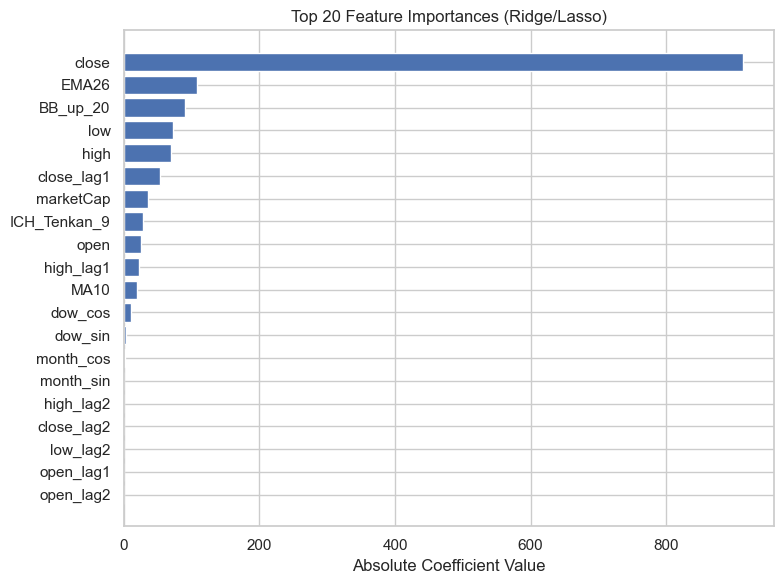

In [93]:
# -----------------------------
# 5) Feature Importance (for Ridge/Lasso)
# -----------------------------
import matplotlib.pyplot as plt

# Extract model and coefficients
final_model = search.best_estimator_.named_steps["model"]
feature_names = X_tr.columns

coef = final_model.coef_

# Create a DataFrame for sorting and display
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef,
    "abs_importance": np.abs(coef)
}).sort_values("abs_importance", ascending=False)

print("\n=== Top 10 Important Features ===")
print(feat_imp.head(10))

# --- Plot the top 20 features ---
plt.figure(figsize=(8, 6))
top_feats = feat_imp.head(20)
plt.barh(top_feats["feature"], top_feats["abs_importance"])
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 20 Feature Importances (Ridge/Lasso)")
plt.tight_layout()
plt.show()

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# --- define base model ---
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# --- search space ---
param_dist = {
    "n_estimators": [100, 200, 400, 800, 1200],
    "max_depth": [None, 5, 8, 10, 12, 15],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", 0.5, 0.7, 0.9],
    "bootstrap": [True, False],
}

# --- perform random search on the *latest* rolling split ---
search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=40,              # adjust for time/quality
    scoring="neg_root_mean_squared_error",
    cv=[(np.arange(len(X_tr)), np.arange(len(X_va)))],  # single fold CV using your split
    n_jobs=-1,
    verbose=1,
    random_state=42,
    refit=True
)

search.fit(X_tr, y_tr)

print("\n=== Best Model ===")
print("Best RMSE (CV):", -search.best_score_)
print("Best Params:", search.best_params_)


Fitting 1 folds for each of 40 candidates, totalling 40 fits

=== Best Model ===
Best RMSE (CV): 2.9965443395988496
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


In [95]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [96]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [97]:
model = RandomForestRegressor(
    n_estimators=search.best_params_["n_estimators"],
    max_depth=search.best_params_["max_depth"],
    min_samples_split=search.best_params_["min_samples_split"],
    min_samples_leaf=search.best_params_["min_samples_leaf"],
    max_features=search.best_params_["max_features"],
    bootstrap=search.best_params_["bootstrap"],
    random_state=42,
    n_jobs=-1
)

In [98]:
best_rf = model.fit(X_tr, y_tr)

### J.4 Model Technical Performance

> Provide some explanations on model performance



[Validation] RMSE: 129.8745 | MAE: 102.2874 | R²: 0.8629

[Test] RMSE: 152.9577 | MAE: 122.5977 | R²: 0.9044


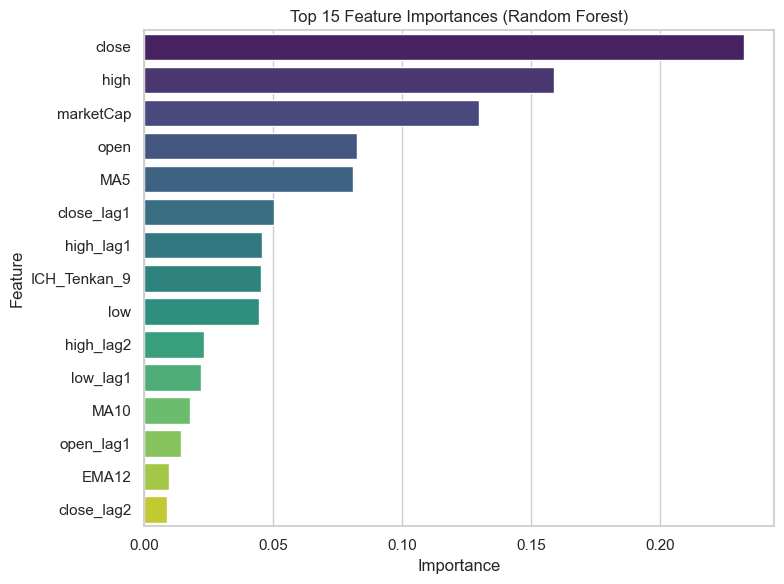

In [99]:
y_va_pred = best_rf.predict(X_va)
y_te_pred = best_rf.predict(X_te)

def eval_regression(y_true, y_pred, label):
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{label}] RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")
    return rmse, mae, r2

eval_regression(y_va, y_va_pred, "Validation")
eval_regression(y_te, y_te_pred, "Test")

# --- Optional: Feature importance ---
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(best_rf.feature_importances_, index=X_tr.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15], palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [100]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

In [101]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [102]:
# <Student to fill this section>

In [103]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [104]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [105]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [106]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [107]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [108]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)